In [1]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt

base = "/home/colombelli/Documents/ufrgs/data viz/trabs/stellargraph/"

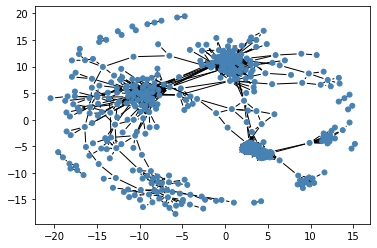

In [7]:
fig, ax = plt.subplots()
ig.plot(g, target=ax, layout=layout)

In [88]:
def get_graph(net, remove_autoconnections=True):
    df = pd.read_csv(base+net+"/patients_edges.csv", index_col=0)
    df.reset_index(inplace=True)
    if remove_autoconnections:
        df = df[df['source'] != df['target']] 
    df_cls =  pd.read_csv(f"{base+net}/patients_classes.csv", index_col=0)
    
    g = ig.Graph.DataFrame(df, directed=False)
    
    
    colors = []
    for patient in g.vs["name"]:

        cls = df_cls.loc[patient, :]['class']

        if cls == "stage1":
            colors.append("green")
        elif cls ==  "stage2":
            colors.append("blue")
        elif cls ==  "stage3":
            colors.append("magenta")
        elif cls ==  "stage4":
            colors.append("red")
        elif cls ==  "control":
            colors.append("yellow")

    g.vs["color"] = colors
    return g




def plot_graph(net, remove_autoconnections=True):
    
    df = pd.read_csv(base+net+"/patients_edges.csv", index_col=0)
    df.reset_index(inplace=True)
    #if remove_autoconnections:
    #    df = df[df['source'] != df['target']] 
    df_cls =  pd.read_csv(f"{base+net}/patients_classes.csv", index_col=0)
    
    g = ig.Graph.DataFrame(df, directed=False)
    
    
    colors = []
    for patient in g.vs["name"]:

        cls = df_cls.loc[patient, :]['class']

        if cls == "stage1":
            colors.append("green")
        elif cls ==  "stage2":
            colors.append("blue")
        elif cls ==  "stage3":
            colors.append("magenta")
        elif cls ==  "stage4":
            colors.append("red")
        elif cls ==  "control":
            colors.append("yellow")

    g.vs["color"] = colors
    
    
    if remove_autoconnections:
        for i in range(len(g.vs)):
            g.delete_edges([(i,i)])
    
    """
    edge_colors = []
    for e in g.es:
        if e['weight'] >= 0:
            edge_colors.append("black")
        else:
            edge_colors.append("orange")
    g.es["color"] = edge_colors
    """
    for e in g.es:
        n1, n2 = e.tuple
        if g.vs[n1]['color'] == g.vs[n2]['color']:
            e['color'] = 'black'
        else:
            e['color'] = 'orange'
    
    
    layout = g.layout(layout='auto')
    out = ig.plot(g, layout = layout, bbox = (700, 700), margin = 10, vertex_size=10)
    if remove_autoconnections:
        out.save(base+net+"/graph_plot.pdf")
    else:
        out.save(base+net+"/graph_plot_autoconnections.pdf")
    return out, g


def get_graph_cis(g):
    return ci, cin, ci1, ci2, ci3, ci4

def get_graph_ces(g):
    return ce, cen, ce1, ce2, ce3, ce4

In [89]:
plot_graph("R1")
plot_graph("R2")
plot_graph("R3")
plot_graph("R4")
plot_graph("R5")
print("Saved!")

Saved!


In [90]:
plot_graph("R1", False)
plot_graph("R2", False)
plot_graph("R3", False)
plot_graph("R4", False)
plot_graph("R5", False)
print("Saved!")

Saved!


In [62]:
o = plot_graph("R4")

In [47]:
g = get_graph("R5")

In [50]:
layout = g.layout(layout='auto')
out = ig.plot(g, layout = layout, bbox = (700, 700), margin = 10, vertex_size=10)

In [76]:
for e in g.es:
    n1, n2 = e.tuple
    if g.vs[n1]['color'] == g.vs[n2]['color']:
        e['color'] = 'black'
    else:
        e['color'] = 'orange'

In [84]:
len(g.vs)

201

In [82]:
df = pd.read_csv(base+"R1"+"/patients_edges.csv", index_col=0)

In [83]:
df

,target,weight
source,,
TCGA.CJ.5672.11,TCGA.CJ.5672.11,1.000000
TCGA.CJ.5672.11,TCGA.CJ.5678.11,0.883499
TCGA.CJ.5672.11,TCGA.B0.5712.11,0.741992
TCGA.CJ.5672.11,TCGA.CZ.5458.11,0.859380
TCGA.CJ.5672.11,TCGA.CW.5580.11,0.870693
...,...,...
TCGA.B0.4819.01,TCGA.B0.4819.01,1.000000
TCGA.B0.4698.01,TCGA.B0.4698.01,1.000000
TCGA.B0.4712.01,TCGA.B0.4712.01,1.000000
